# Lecture 5

## September 24, 2015

### Last time

$ Y \overset{indep}{\sim} N( \theta^T \phi(X), \sigma^2)$

### Today (Murphy 7.5, 13), (Bishop 3.2)

- First: how do you get a point estimate?  What if you have to guess, what is $\theta$?
- Regularization
- Bias-variance tradeoff
- Model selection (how to choose $\lambda$)


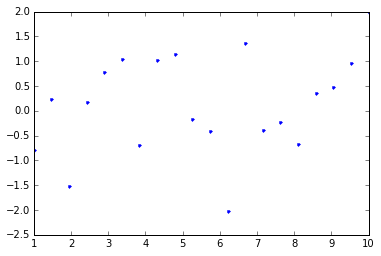

[  1.           1.47368421   1.94736842   2.42105263   2.89473684
   3.36842105   3.84210526   4.31578947   4.78947368   5.26315789
   5.73684211   6.21052632   6.68421053   7.15789474   7.63157895
   8.10526316   8.57894737   9.05263158   9.52631579  10.        ]
[-0.78426937  0.24280769 -1.51747003  0.18335922  0.78339159  1.03679744
 -0.68180652  1.02389945  1.15327011 -0.16536511 -0.39942455 -2.03008955
  1.3620683  -0.3870142  -0.23108135 -0.67255566  0.36414932  0.47329389
  0.957015    1.99040348]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 20
x = np.linspace(1,10,20)
y = np.random.randn(1,20)[0]

plt.plot(x,y, '.'); plt.show()

print x
print y

Basis functions will be the powers of $x$: $\phi(x) = \{ 1, x, x^2, ..., x^d-1\}$ 

$\hat{\theta}_{\text{OLS}} = \underset{\theta}{\text{argmin}} \text{ RSS}(\theta)$

Gaussian prior

$p(\theta) = N(\theta \ | \ 0, \sigma_0^2 I_{d\times d})$

$\hat{\theta}_{\text{MAP}} = \underset{\theta}{\text{argmax}}$ $\log p(y^{(lim)} \ | \ \theta) + \log p(\theta)$

Then plug in the form of the density...

$=\underset{\theta}{\text{argmin}} \big[\text{RSS}(\theta) + \lambda||\theta||_2^2 \big]$

where $\lambda := \frac{\sigma^2}{\sigma_0^2}$ and $||\theta||_2^2 = \theta^T \theta$

$\textbf{Solve for $\theta$}$

$\nabla_{\theta}  \ f(\theta) = 0$

$\hat{\theta} = (\lambda I_{d \times d} + \Phi^T \Phi)^{-1} \Phi^T Y$

"Ridge regresion"

Exercise: For $\lambda > 0, \lambda I_{d \times d} + \Phi^T \Phi$ is invertible.

**Bias-variance tradeoff**

$Y = \theta^T \phi(X) + \epsilon$

$\mathbb{E}_{XY}[(\mathbb{E}[Y|X]-Y)^2] = \sigma^2$

Risk: $\mathbb{E}[(h(X) - \mathbb{E}[Y|X])^2] = \mathbb{E}_X[(h(X,D)=\mathbb{E}[Y|X])^2]$

$\mathbb{E}_D[Risk] = (check this!) = \mathbb{E}_X \{ (\mathbb{E}_D[h(X,D)] - \mathbb{E}[Y|X])^2\} + \mathbb{E}_X\mathbb{E}_D[(h(X,D) - \mathbb{E}_D[h(X,D)])^2]$

$ =$ bias-term + variance-term

$\mathbb{E}_D[RISK] = (bias)^2 + variance + noise$

**Exercise**: What is the bias of $\hat{\theta}_{\text{OLS}}$?

Answer: it's 0

____

How to choose $\lambda$?

$h(x) = \hat{\theta}^T \phi(X)$

Risk = $\mathbb{E}_{XY}[((\theta_{D_1}^{(\lambda)})^T \phi(X) - Y)^2]$

$$\lambda^* = \underset{\lambda}{\text{argmin}} \frac{1}{|D_2|} \sum_{i \in D_@} [(\hat{\theta}_{D_1}^{(\lambda)})^T \phi(x^{(i)}) - y^{(i)}]^2$$

There are other regularizers that are useful

$$\hat{\theta}_{LASSO} = \underset{\theta}{\text{argmin}} \text{ RSS}(\theta) + \lambda||\theta||_1$$